# Gradient Descent
---

## Manual Differentiation

In [255]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Iterable
%matplotlib inline

In [256]:
def f_x(x): return x**3 - 4*x**2 + 6
def df_dx(x): return 3*x**2 - 8*x

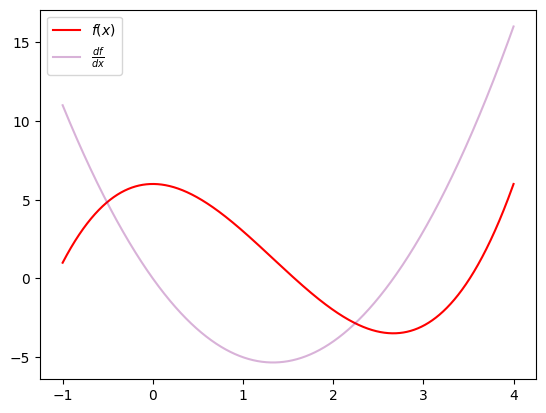

In [257]:
x = np.linspace(-1, 4, 10000)
plt.plot(x, f_x(x), color="red", label="$f(x)$")
plt.plot(x, df_dx(x), color="purple", label=r"$\frac{df}{dx}$", alpha=0.3)
plt.legend()
plt.show()

Wherever ∇f(x) < 0, the function is decreasing. When ∇f(x) > 0 the function is increasing. We want to move in the direction opposite the gradient.

In [258]:
def gradient_descent(x0: float, bounds: Iterable, step_size: float, max_iter: int, eps: float) -> Tuple[np.ndarray, np.ndarray]:
    x_history = [x0]
    y_history = [f_x(x0)]

    for i in range(0, max_iter):
        x_t = x_history[i] - (step_size * df_dx(x_history[i]))
        x_t = min(max(bounds[0], x_t), bounds[1]) # Ensures that no movement occurs outside of the function bounds
        y_t = f_x(x_t)

        x_history.append(x_t)
        y_history.append(y_t)

        print(f"Iteration: {i+1}")
        print(f"Current local minimum: {x_t}")
        print(f"Function eval: {y_t}")
        print("-"*30)

        if eps:
            if np.abs(x_t - x_history[i]) < eps:
                break

    return x_history, y_history

bounds = [min(x), max(x)]
x_hist, y_hist = gradient_descent(x0=0.5, bounds=bounds, step_size=0.05, max_iter=100, eps=0.001)

Iteration: 1
Current local minimum: 0.6625
Function eval: 4.535150390625
------------------------------
Iteration: 2
Current local minimum: 0.8616640625
Function eval: 3.6698955443552763
------------------------------
Iteration: 3
Current local minimum: 1.0949599440093996
Function eval: 2.517039179928002
------------------------------
Iteration: 4
Current local minimum: 1.3531033297653994
Function eval: 1.1538270054458906
------------------------------
Iteration: 5
Current local minimum: 1.6197113685182276
Function eval: -0.24460371775757128
------------------------------
Iteration: 6
Current local minimum: 1.8740761783294402
Function eval: -1.4665878455611931
------------------------------
Iteration: 7
Current local minimum: 2.0968824213339343
Function eval: -2.367847920080319
------------------------------
Iteration: 8
Current local minimum: 2.2760980065326186
Function eval: -2.9308848265169036
------------------------------
Iteration: 9
Current local minimum: 2.409443888844402
Funct

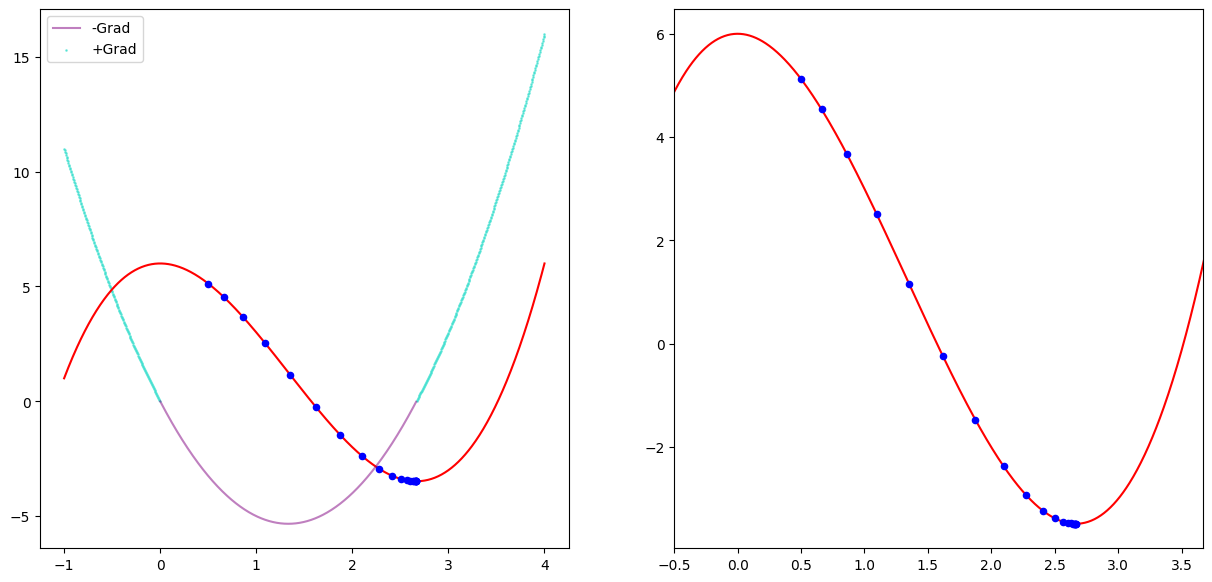

In [259]:
fig = plt.figure(figsize=(15,7))
x = np.linspace(-1, 4, 1000)
y = list(map(f_x, x))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

# Base plot
ax1.plot(x, y, color="red")
y_diff = np.array(list(map(df_dx, x)))
neg_grad = y_diff[y_diff < 0]
pos_grad = y_diff[y_diff > 0]

ax1.plot(x[y_diff < 0], neg_grad, color="purple", label="-Grad", alpha=0.5)
ax1.scatter(x[y_diff > 0], pos_grad, color="turquoise", s=0.75, label="+Grad", alpha=0.7)
ax1.scatter(x_hist, y_hist, color="blue", s=20, zorder=2)

ax2.set_xlim([np.min(x_hist)-1, np.max(x_hist)+1])
ax2.plot(x, y, color="red")
ax2.scatter(x_hist, y_hist, color="blue", s=20, zorder=2)
ax1.legend()
plt.show()

## Symbolic Differentiation

Finding the partial derivatives by hand can be tedious and is the option most prone to error. A slightly better way to do this and with less on our part is by **symbolic differentiation**. If you have every used a tool like symbolab to compute integrals/derivatives this is similar.

In [260]:
from sympy import symbols, lambdify
x1, x2 = symbols('x1 x2')
f_x = x2**3 + x1**2 + x1*x2 + 1
f_x

x1**2 + x1*x2 + x2**3 + 1

In [261]:
f_x.diff(x1)

2*x1 + x2

In [262]:
from sympy.tensor.array import derive_by_array

grad = derive_by_array(f_x, (x1, x2))
grad

[2*x1 + x2, x1 + 3*x2**2]

In [263]:
f_x_lambda = lambdify([x1, x2], f_x, "numpy") # The function
grad_f = [lambdify([x1, x2], f, "numpy") for f in grad] # The gradient of the function w.r.t. each variable

In [264]:
x0 = np.array([2, 10])
display(grad[0])
grad_f[0](*x0)

2*x1 + x2

14

In [265]:
f_x_lambda(*x0)

1025

In [266]:
def gradient_descent(x0: float, bounds: Iterable, step_size: float, max_iter: int, eps: float) -> Tuple[np.ndarray, np.ndarray]:
    x_history = [x0]
    y_history = [f_x_lambda(*x0)]

    for i in range(max_iter):
        x_t = np.array([0., 0.])
        for j in range(len(x0)):
            x_t[j] = x_history[i][j] - (step_size * grad_f[j](*x_history[i])) # Update parameter j
            x_t[j] = min(max(bounds[j][0], x_t[j]), bounds[j][1]) # Ensures that no movement occurs outside of the function bounds

        y_t = f_x_lambda(*x_t)

        x_history.append(x_t)
        y_history.append(y_t)

        print(f"Iteration: {i+1}")
        print(f"Current local minimum: {x_t}")
        print(f"Function eval: {y_t}")
        print("-"*30)

        if eps:
            if np.abs(x_t - x_history[i]).sum() < eps:
                break

    return x_history, y_history


x0 = np.array([2, 10])
bounds = [(-np.inf, np.inf) for _ in range(2)]
hist = gradient_descent(x0=x0, bounds=bounds, step_size=0.01, max_iter=100, eps=0.001)

Iteration: 1
Current local minimum: [1.86 6.98]
Function eval: 357.5107920000001
------------------------------
Iteration: 2
Current local minimum: [1.753    5.499788]
Function eval: 180.06989910556652
------------------------------
Iteration: 3
Current local minimum: [1.66294212 4.57482796]
Function eval: 107.11985758105766
------------------------------
Iteration: 4
Current local minimum: [1.583935   3.93032701]
Function eval: 70.44784284548437
------------------------------
Iteration: 5
Current local minimum: [1.51295303 3.45106355]
Function eval: 49.61193730695108
------------------------------
Iteration: 6
Current local minimum: [1.44818333 3.07863883]
Function eval: 36.735059720954254
------------------------------
Iteration: 7
Current local minimum: [1.38843328 2.77981649]
Function eval: 28.268034140573906
------------------------------
Iteration: 8
Current local minimum: [1.33286645 2.53411076]
Function eval: 22.427507229394543
------------------------------
Iteration: 9
Curren

## Autograd

### Pytorch

#### Neural Network Example

In [267]:
import torch
import torch.nn.functional as F
import torch.nn as nn

torch.manual_seed(192)

batch_X = torch.rand((20, 100))
batch_Y = torch.rand((20, ))
W = torch.rand((30, 100), requires_grad=True)
b = torch.rand((30,))

activations = F.relu(torch.sum(batch_X @ W.T + b, axis=1))
activations

tensor([800.9057, 820.4493, 748.7545, 846.4409, 768.4225, 879.1286, 712.5182,
        707.7337, 803.5945, 749.7166, 758.0955, 773.0328, 806.3203, 765.3997,
        720.9338, 754.8772, 827.6507, 763.8168, 700.7143, 755.8879],
       grad_fn=<ReluBackward0>)

In [268]:
loss = nn.MSELoss()(batch_Y, activations)
loss
loss.backward()

In [269]:
W.grad

tensor([[701.6978, 764.7663, 817.0551,  ..., 724.7968, 803.5891, 549.8976],
        [701.6978, 764.7663, 817.0551,  ..., 724.7968, 803.5891, 549.8976],
        [701.6978, 764.7663, 817.0551,  ..., 724.7968, 803.5891, 549.8976],
        ...,
        [701.6978, 764.7663, 817.0551,  ..., 724.7968, 803.5891, 549.8976],
        [701.6978, 764.7663, 817.0551,  ..., 724.7968, 803.5891, 549.8976],
        [701.6978, 764.7663, 817.0551,  ..., 724.7968, 803.5891, 549.8976]])

#### Classical Example

In [270]:
x = torch.rand((20,), requires_grad=True)

def torch_f(x): return (torch.sin(x) + torch.cos(x)**6 + 1/1+torch.exp(x)).mean()

y = torch_f(x)
y.backward()

In [271]:
(x.detach().clone() - x.grad)

tensor([ 0.3848,  0.6649,  0.8092,  0.4758,  0.5127,  0.0332,  0.4222,  0.3086,
         0.1175,  0.1416,  0.5215,  0.7625,  0.2948,  0.7819, -0.0881,  0.5417,
         0.8413,  0.3546,  0.7818,  0.8437])

In [272]:
def gradient_descent(x0: float, step_size: float, max_iter: int, eps: float) -> Tuple[np.ndarray, np.ndarray]:
    x_history = [x0]

    with torch.no_grad():
        y_history = [torch_f(x)]

    for i in range(max_iter):
        y_t = torch_f(x_history[i])

        y_t.backward() # Compute gradient backwards through computational graph

        x_t = x_history[i].detach().clone() - step_size*x_history[i].grad
        x_t.requires_grad = True
        x_history[i].requires_grad = False # No longer need the gradient stored in parameters from t-1 step

        x_history.append(x_t)
        y_history.append(y_t.item())

        print(f"Iteration: {i+1}")
        print(f"Current local minimum: {x_t}")
        print(f"Function eval: {y_t.item()}")
        print("-"*30)

        if eps:
            with torch.no_grad():
                if np.abs(x_t - x_history[i]).sum() < eps:
                    break

    return x_history, y_history

x0 = torch.rand((20,), requires_grad=True)


history = gradient_descent(x0, step_size=0.05, max_iter=1000, eps=0.001)

Iteration: 1
Current local minimum: tensor([0.3379, 0.7207, 0.7826, 0.3361, 0.2130, 0.9848, 0.9920, 0.0355, 0.3813,
        0.1891, 0.2233, 0.1713, 0.7970, 0.4734, 0.0969, 0.3667, 0.7501, 0.7186,
        0.2139, 0.2106], requires_grad=True)
Function eval: 3.6259231567382812
------------------------------
Iteration: 2
Current local minimum: tensor([0.3357, 0.7161, 0.7772, 0.3339, 0.2103, 0.9774, 0.9845, 0.0309, 0.3792,
        0.1862, 0.2207, 0.1683, 0.7915, 0.4710, 0.0931, 0.3646, 0.7451, 0.7140,
        0.2112, 0.2079], requires_grad=True)
Function eval: 3.618985652923584
------------------------------
Iteration: 3
Current local minimum: tensor([0.3336, 0.7115, 0.7719, 0.3318, 0.2076, 0.9700, 0.9771, 0.0263, 0.3770,
        0.1833, 0.2181, 0.1652, 0.7861, 0.4686, 0.0892, 0.3625, 0.7402, 0.7094,
        0.2085, 0.2051], requires_grad=True)
Function eval: 3.6121153831481934
------------------------------
Iteration: 4
Current local minimum: tensor([0.3314, 0.7069, 0.7667, 0.3296, 0.2048,

In [273]:
import pandas as pd
from time import perf_counter

def norm(v): 
    return float(np.linalg.norm(v))


In [274]:
# f1: x^2 + y^2
def f1(x): 
    x = np.asarray(x, float); return x[0]**2 + x[1]**2
def g1(x):
    x = np.asarray(x, float); return np.array([2*x[0], 2*x[1]], float)
def H1(x):
    return np.array([[2.0, 0.0],[0.0, 2.0]], float)

# Rosenbrock f2: (1 - x)^2 + 100 (y - x^2)^2
def f2(x):
    x = np.asarray(x, float); return (1 - x[0])**2 + 100.0*(x[1] - x[0]**2)**2
def g2(x):
    x = np.asarray(x, float)
    dfdx = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
    dfdy = 200*(x[1] - x[0]**2)
    return np.array([dfdx, dfdy], float)
def H2(x):
    x = np.asarray(x, float)
    return np.array([[2 - 400*(x[1] - 3*x[0]**2), -400*x[0]],
                     [-400*x[0],                 200.0]], float)

# f3: x^2 + y^2 + 10 cos(x) + 10 cos(y)
def f3(x):
    x = np.asarray(x, float); return x[0]**2 + x[1]**2 + 10*np.cos(x[0]) + 10*np.cos(x[1])
def g3(x):
    x = np.asarray(x, float); return np.array([2*x[0] - 10*np.sin(x[0]), 2*x[1] - 10*np.sin(x[1])], float)
def H3(x):
    x = np.asarray(x, float); return np.array([[2 - 10*np.cos(x[0]), 0.0],[0.0, 2 - 10*np.cos(x[1])]], float)


In [275]:
def gradient_descent(f, g, x0, lr=1e-3, max_iter=2000, tol=1e-6, bounds=None):
    x = np.array(x0, float); path = [x.copy()]
    for k in range(max_iter):
        x_new = x - lr * g(x)
        if bounds is not None:
            lo, hi = bounds[0], bounds[1]
            x_new = np.clip(x_new, lo, hi)
        path.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol: break
        x = x_new
    return dict(path=np.array(path), iters=k+1, x_final=x, f_final=float(f(x)), time=np.nan)

def newton(f, g, H, x0, lr=1.0, max_iter=2000, tol=1e-6, reg=1e-8, bounds=None):
    x = np.array(x0, float); path = [x.copy()]
    I = np.eye(len(x))
    for k in range(max_iter):
        p = np.linalg.solve(H(x) + reg*I, g(x))
        x_new = x - lr * p
        if bounds is not None:
            lo, hi = bounds[0], bounds[1]
            x_new = np.clip(x_new, lo, hi)
        path.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol: break
        x = x_new
    return dict(path=np.array(path), iters=k+1, x_final=x, f_final=float(f(x)), time=np.nan)

def adagrad(f, g, x0, lr=1e-2, eps=1e-8, max_iter=2000, tol=1e-6, bounds=None):
    x = np.array(x0, float); G = np.zeros_like(x); path = [x.copy()]
    for k in range(max_iter):
        grad = g(x); G += grad*grad
        x_new = x - (lr / (np.sqrt(G) + eps)) * grad
        if bounds is not None:
            lo, hi = bounds[0], bounds[1]
            x_new = np.clip(x_new, lo, hi)
        path.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol: break
        x = x_new
    return dict(path=np.array(path), iters=k+1, x_final=x, f_final=float(f(x)), time=np.nan)

def adam(f, g, x0, lr=5e-3, beta1=0.9, beta2=0.999, eps=1e-8, max_iter=2000, tol=1e-6, bounds=None):
    x = np.array(x0, float); m = np.zeros_like(x); v = np.zeros_like(x); path = [x.copy()]
    for t in range(1, max_iter+1):
        grad = g(x)
        m = beta1*m + (1-beta1)*grad
        v = beta2*v + (1-beta2)*(grad*grad)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x_new = x - lr * m_hat / (np.sqrt(v_hat) + eps)
        if bounds is not None:
            lo, hi = bounds[0], bounds[1]
            x_new = np.clip(x_new, lo, hi)
        path.append(x_new.copy())
        if np.linalg.norm(x_new - x) < tol: break
        x = x_new
    return dict(path=np.array(path), iters=t, x_final=x, f_final=float(f(x)), time=np.nan)


In [276]:
functions = [
    dict(name='f1_quadratic',    f=f1, g=g1, H=H1, bounds=(-3.5, 3.5)),
    dict(name='f2_rosenbrock',   f=f2, g=g2, H=H2, bounds=(-2.0, 2.0)),
    dict(name='f3_cosine_bumps', f=f3, g=g3, H=H3, bounds=(-4.0, 4.0)),
]

inits = [np.array([-2.0, 2.0]), np.array([0.5, -1.5]), np.array([1, 2])]

lrs = {
    'GD':      [0.00001, 0.0001, 0.001],
    'Newton':  [1.0, 0.5, 0.25],
    'AdaGrad': [0.001, 0.005, 0.01],
    'Adam':    [0.001, 0.002, 0.005],
}


In [277]:
rows = []
for fun in functions:
    f, g, H = fun['f'], fun['g'], fun['H']
    for x0 in inits:
        for lr in lrs['GD']:
            out = gradient_descent(f, g, x0, lr=lr)
            t = out.get('time', out.get('time_sec', np.nan))
            rows.append(dict(func=fun['name'], method='GD', lr=lr, init=tuple(x0),
                             iters=out['iters'], f_final=out['f_final'], x_final=out['x_final'],
                             time=t, path=out['path']))
        for lr in lrs['Newton']:
            out = newton(f, g, H, x0, lr=lr)
            t = out.get('time', out.get('time_sec', np.nan))
            rows.append(dict(func=fun['name'], method='Newton', lr=lr, init=tuple(x0),
                             iters=out['iters'], f_final=out['f_final'], x_final=out['x_final'],
                             time=t, path=out['path']))
        for lr in lrs['AdaGrad']:
            out = adagrad(f, g, x0, lr=lr)
            t = out.get('time', out.get('time_sec', np.nan))
            rows.append(dict(func=fun['name'], method='AdaGrad', lr=lr, init=tuple(x0),
                             iters=out['iters'], f_final=out['f_final'], x_final=out['x_final'],
                             time=t, path=out['path']))
        for lr in lrs['Adam']:
            out = adam(f, g, x0, lr=lr)
            t = out.get('time', out.get('time_sec', np.nan))
            rows.append(dict(func=fun['name'], method='Adam', lr=lr, init=tuple(x0),
                             iters=out['iters'], f_final=out['f_final'], x_final=out['x_final'],
                             time=t, path=out['path']))
df = pd.DataFrame(rows)


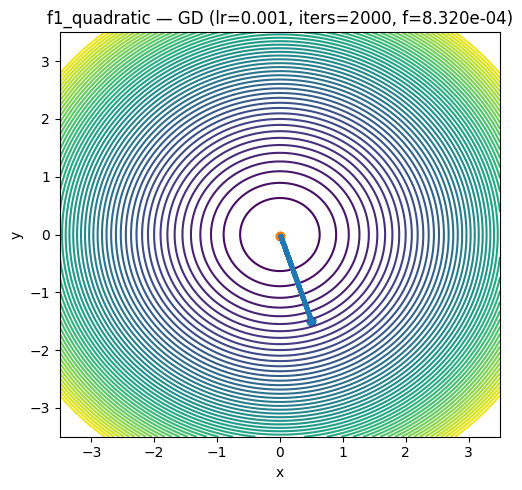

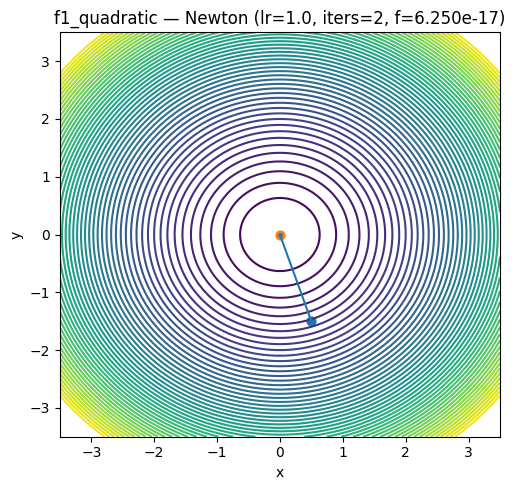

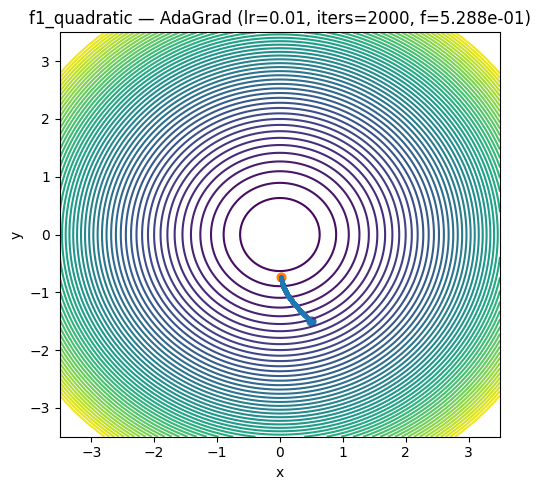

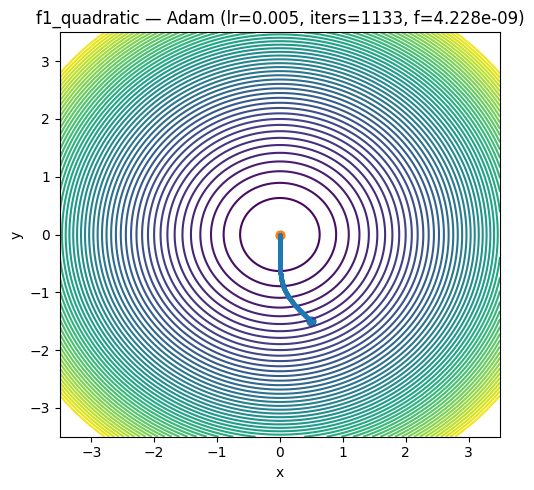

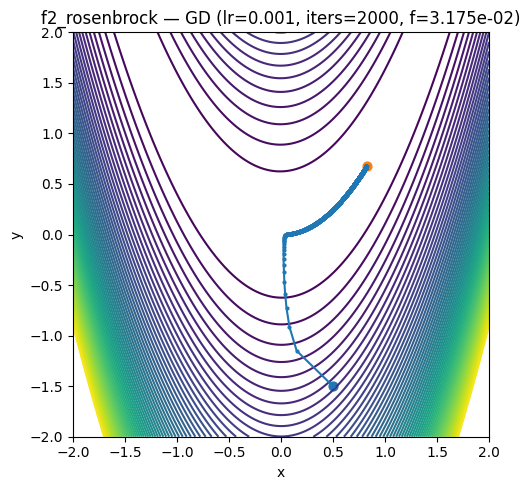

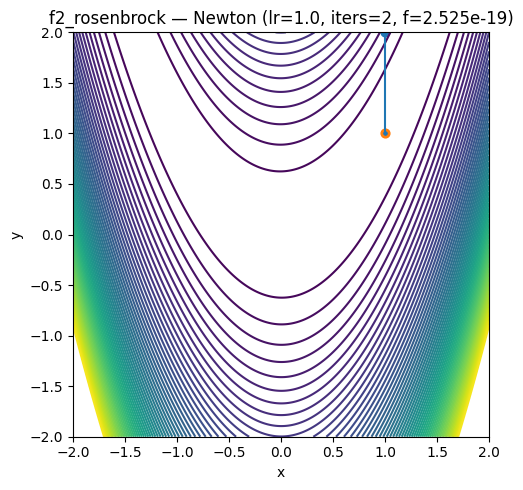

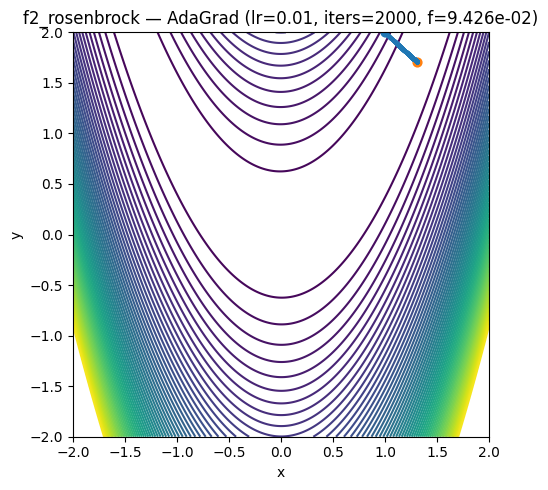

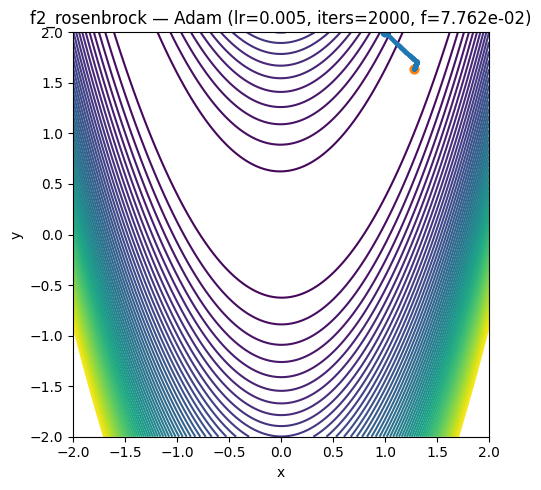

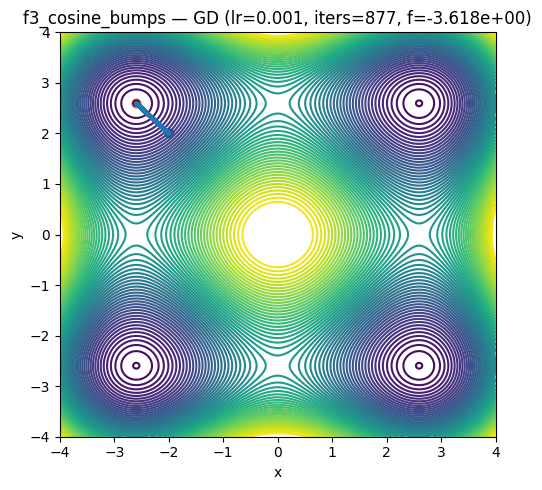

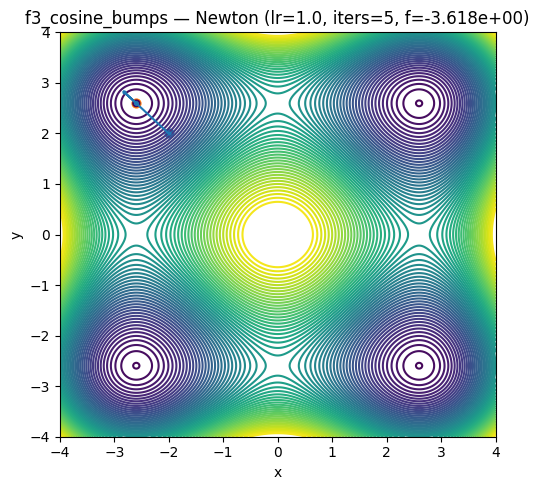

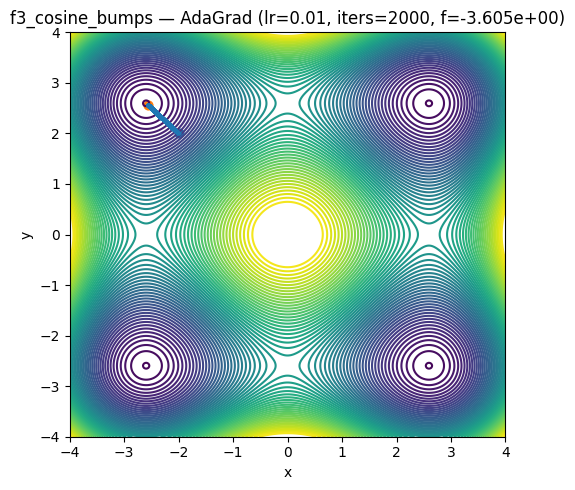

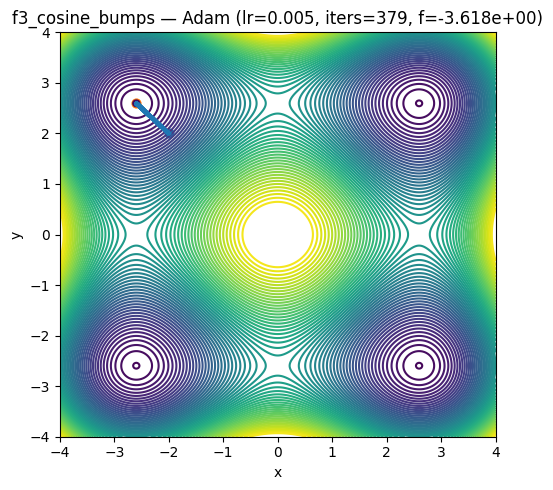

In [278]:
for fun in functions:
    name, f, g, bounds = fun['name'], fun['f'], fun['g'], fun['bounds']
    for method in ['GD','Newton','AdaGrad','Adam']:
        gdf = df[(df.func==name) & (df.method==method)]
        if gdf.empty:
            continue
        row = gdf.loc[gdf['f_final'].idxmin()]
        path = row['path']

        # grid
        xs = np.linspace(bounds[0], bounds[1], 400)
        ys = np.linspace(bounds[0], bounds[1], 400)
        X, Y = np.meshgrid(xs, ys)
        Z = np.array([[f([xx, yy]) for xx, yy in zip(x_row, y_row)] for x_row, y_row in zip(X, Y)])
        zcap = np.quantile(Z, 0.98)
        Z = np.clip(Z, Z.min(), zcap)

        plt.figure(figsize=(5.2,5))
        plt.contour(X, Y, Z, levels=60)

        if path is not None and len(path) > 0:
            xv = np.clip(path[:,0], bounds[0], bounds[1])
            yv = np.clip(path[:,1], bounds[0], bounds[1])
            plt.plot(xv, yv, marker='o', markersize=2)
            plt.scatter(xv[0], yv[0], s=40)  
            plt.scatter(xv[-1], yv[-1], s=40)

        plt.xlim(bounds[0], bounds[1])
        plt.ylim(bounds[0], bounds[1])

        plt.title(f"{name} — {method} (lr={row['lr']}, iters={row['iters']}, f={row['f_final']:.3e})")
        plt.xlabel('x'); plt.ylabel('y'); plt.tight_layout(); plt.show()


In [279]:
rows = []
for fun in functions:
    f, g, H = fun['f'], fun['g'], fun['H']
    for x0 in inits:
        for lr in lrs['GD']:
            out = gradient_descent(f, g, x0, lr=lr)
            t = out.get('time', out.get('time_sec', np.nan))
            rows.append(dict(func=fun['name'], method='GD', lr=lr, init=tuple(x0),
                             iters=out['iters'], f_final=out['f_final'], x_final=out['x_final'],
                             time=t, path=out['path']))
        for lr in lrs['Newton']:
            out = newton(f, g, H, x0, lr=lr)
            t = out.get('time', out.get('time_sec', np.nan))
            rows.append(dict(func=fun['name'], method='Newton', lr=lr, init=tuple(x0),
                             iters=out['iters'], f_final=out['f_final'], x_final=out['x_final'],
                             time=t, path=out['path']))
        for lr in lrs['AdaGrad']:
            out = adagrad(f, g, x0, lr=lr)
            t = out.get('time', out.get('time_sec', np.nan))
            rows.append(dict(func=fun['name'], method='AdaGrad', lr=lr, init=tuple(x0),
                             iters=out['iters'], f_final=out['f_final'], x_final=out['x_final'],
                             time=t, path=out['path']))
        for lr in lrs['Adam']:
            out = adam(f, g, x0, lr=lr)
            t = out.get('time', out.get('time_sec', np.nan))
            rows.append(dict(func=fun['name'], method='Adam', lr=lr, init=tuple(x0),
                             iters=out['iters'], f_final=out['f_final'], x_final=out['x_final'],
                             time=t, path=out['path']))

In [280]:
time_col = "time" if "time" in df.columns else "time_sec"

df_view = (df[['func','method','lr','init','iters','f_final', time_col]]
           .sort_values(['func','method','lr','init'])
           .reset_index(drop=True))
print("All Run!")
display(df_view.head(20))

summary = (df.groupby(['func','method','lr'])
             .agg(iter_mean=('iters','mean'),
                  f_mean=('f_final','mean'),
                  f_std=('f_final','std'),
                  time_mean=(time_col,'mean'))
             .reset_index()
             .sort_values(['func','method','lr']))
print("\nSummary Across Inits:")
display(summary)


All Run!


func   method       lr         init  iters       f_final  time
0   f1_quadratic  AdaGrad  0.00100  (-2.0, 2.0)   2000  7.316693e+00   NaN
1   f1_quadratic  AdaGrad  0.00100  (0.5, -1.5)   2000  2.168389e+00   NaN
2   f1_quadratic  AdaGrad  0.00100       (1, 2)   2000  4.492598e+00   NaN
3   f1_quadratic  AdaGrad  0.00500  (-2.0, 2.0)   2000  4.979373e+00   NaN
4   f1_quadratic  AdaGrad  0.00500  (0.5, -1.5)   2000  1.197627e+00   NaN
5   f1_quadratic  AdaGrad  0.00500       (1, 2)   2000  2.847705e+00   NaN
6   f1_quadratic  AdaGrad  0.01000  (-2.0, 2.0)   2000  2.864150e+00   NaN
7   f1_quadratic  AdaGrad  0.01000  (0.5, -1.5)   2000  5.288292e-01   NaN
8   f1_quadratic  AdaGrad  0.01000       (1, 2)   2000  1.518926e+00   NaN
9   f1_quadratic     Adam  0.00100  (-2.0, 2.0)   2000  4.830606e-01   NaN
10  f1_quadratic     Adam  0.00100  (0.5, -1.5)   2000  3.365441e-02   NaN
11  f1_quadratic     Adam  0.00100       (1, 2)   2000  2.419572e-01   NaN
12  f1_quadratic     Adam  0.00200  (-2.0, 2.0)   2000  3.415449e-03   NaN
13  f1_quadratic     Adam  0.00200  (0.5, -1.5)   2000  1.072161e-05   NaN
14  f1_quadratic     Adam  0.00200       (1, 2)   2000  1.707724e-03   NaN
15  f1_quadratic     Adam  0.00500  (-2.0, 2.0)   1525  6.527679e-09   NaN
16  f1_quadratic     Adam  0.00500  (0.5, -1.5)   1133  4.228018e-09   NaN
17  f1_quadratic     Adam  0.00500       (1, 2)   1495  6.827299e-09   NaN
18  f1_quadratic       GD  0.00001  (-2.0, 2.0)   2000  7.384925e+00   NaN
19  f1_quadratic       GD  0.00001  (0.5, -1.5)   2000  2.307789e+00   NaN


Summary Across Inits:


func   method       lr    iter_mean        f_mean  \
0      f1_quadratic  AdaGrad  0.00100  2000.000000  4.659226e+00   
1      f1_quadratic  AdaGrad  0.00500  2000.000000  3.008235e+00   
2      f1_quadratic  AdaGrad  0.01000  2000.000000  1.637302e+00   
3      f1_quadratic     Adam  0.00100  2000.000000  2.528908e-01   
4      f1_quadratic     Adam  0.00200  2000.000000  1.711298e-03   
5      f1_quadratic     Adam  0.00500  1384.333333  5.860999e-09   
6      f1_quadratic       GD  0.00001  2000.000000  4.769431e+00   
7      f1_quadratic       GD  0.00010  2000.000000  2.321347e+00   
8      f1_quadratic       GD  0.00100  2000.000000  1.719395e-03   
9      f1_quadratic   Newton  0.25000    47.333333  1.255479e-11   
10     f1_quadratic   Newton  0.50000    21.666667  1.743199e-12   
11     f1_quadratic   Newton  1.00000     2.000000  1.291667e-16   
12    f2_rosenbrock  AdaGrad  0.00100  2000.000000  1.890835e+02   
13    f2_rosenbrock  AdaGrad  0.00500  2000.000000  5.209041e+01   
14    f2_rosenbrock  AdaGrad  0.01000  2000.000000  2.120508e+01   
15    f2_rosenbrock     Adam  0.00100  2000.000000  3.957229e+00   
16    f2_rosenbrock     Adam  0.00200  2000.000000  2.493059e+00   
17    f2_rosenbrock     Adam  0.00500  2000.000000  2.277995e+00   
18    f2_rosenbrock       GD  0.00001  2000.000000  2.378241e+00   
19    f2_rosenbrock       GD  0.00010  2000.000000  2.055034e+00   
20    f2_rosenbrock       GD  0.00100  2000.000000  6.713378e-02   
21    f2_rosenbrock   Newton  0.25000    72.333333  3.395946e-10   
22    f2_rosenbrock   Newton  0.50000    36.000000  1.215955e-10   
23    f2_rosenbrock   Newton  1.00000     4.333333  5.152523e-14   
24  f3_cosine_bumps  AdaGrad  0.00100  2000.000000  5.033586e+00   
25  f3_cosine_bumps  AdaGrad  0.00500  2000.000000  1.804701e+00   
26  f3_cosine_bumps  AdaGrad  0.01000  2000.000000 -9.772227e-01   
27  f3_cosine_bumps     Adam  0.00100  1953.333333 -3.525120e+00   
28  f3_cosine_bumps     Adam  0.00200  1666.666667 -3.617966e+00   
29  f3_cosine_bumps     Adam  0.00500   723.000000 -3.617967e+00   
30  f3_cosine_bumps       GD  0.00001  2000.000000  4.795230e+00   
31  f3_cosine_bumps       GD  0.00010  2000.000000 -2.134219e+00   
32  f3_cosine_bumps       GD  0.00100   990.666667 -3.617967e+00   
33  f3_cosine_bumps   Newton  0.25000    43.333333  4.254689e+00   
34  f3_cosine_bumps   Newton  0.50000    19.666667  4.254689e+00   
35  f3_cosine_bumps   Newton  1.00000   670.333333  8.391702e+01   

           f_std  time_mean  
0   2.578193e+00        NaN  
1   1.895977e+00        NaN  
2   1.172152e+00        NaN  
3   2.249025e-01        NaN  
4   1.702366e-03        NaN  
5   1.422116e-09        NaN  
6   2.542062e+00        NaN  
7   1.237256e+00        NaN  
8   9.164214e-04        NaN  
9   3.071097e-12        NaN  
10  5.722113e-13        NaN  
11  6.884463e-17        NaN  
12  1.163985e+02        NaN  
13  6.620321e+01        NaN  
14  3.098449e+01        NaN  
15  3.414555e+00        NaN  
16  3.503909e+00        NaN  
17  3.438428e+00        NaN  
18  3.193810e+00        NaN  
19  3.041916e+00        NaN  
20  5.316319e-02        NaN  
21  5.827454e-10        NaN  
22  2.097534e-10        NaN  
23  8.924306e-14        NaN  
24  6.083878e+00        NaN  
25  4.964303e+00        NaN  
26  2.766728e+00        NaN  
27  1.220751e-01        NaN  
28  8.147878e-07        NaN  
29  5.801458e-09        NaN  
30  5.976383e+00        NaN  
31  1.855893e+00        NaN  
32  3.219056e-10        NaN  
33  6.817920e+00        NaN  
34  6.817920e+00        NaN  
35  1.415114e+02        NaN